# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Asgarindo Dwiki Ibrahim Adji
- **Email:** asgarindo9@gmail.com
- **ID Dicoding:** Asgarindo Dwiki Ibrahim Adji

## Menentukan Pertanyaan Bisnis

- Produk dengan kategori apa yang memiliki tingkat penjualan tertinggi dalam satu tahun terakhir?
- Dari wilayah mana pelanggan dengan jumlah pesanan tertinggi berasal?
- Apakah produk dengan lebih banyak foto memiliki tingkat pembelian yang lebih tinggi?
- Metode pembayaran apa yang paling sering digunakan oleh pelanggan?

## Import Semua Packages/Library yang Digunakan

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

## Data Wrangling

### Gathering Data

Dataset yang digunakan dalam proyek ini terdiri dari beberapa file CSV yang berisi informasi penting terkait transaksi e-commerce, antara lain:
- **customers_dataset.csv** - Informasi pelanggan
- **orders_dataset.csv** - Data Pesanan
- **order_items_dataset.csv** - Detail produk dalam pesanan
- **products_dataset.csv** - Informasi produk
- **order_reviews_dataset.csv** - Data ulasan pelanggan
- **geolocation_dataset.csv** - Informasi geolokasi
- **order_payments_dataset.csv** - Informasi pembayaran
- **product_category_name_translation.csv** - Terjemahan kategori produk
- **sellers_dataset.csv** - Informasi penjual

##### Membuat Tabel Data Customer

In [190]:
customer_df = pd.read_csv("https://raw.githubusercontent.com/asgarindoo/E-commerce_Analysis/main/data/customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


##### Membuat Tabel Data Order

In [191]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/asgarindoo/E-commerce_Analysis/main/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


##### Membuat Tabel Data Order Item

In [192]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/asgarindoo/E-commerce_Analysis/main/data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


##### Membuat Tabel Data Product

In [193]:
products_df = pd.read_csv("https://raw.githubusercontent.com/asgarindoo/E-commerce_Analysis/main/data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


##### Membuat Tabel Data Order Review

In [194]:
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/asgarindoo/E-commerce_Analysis/main/data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


##### Membuat Tabel Data Geolocation

In [195]:
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/asgarindoo/E-commerce_Analysis/main/data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


##### Membuat Tabel Data Order Payment

In [196]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/asgarindoo/E-commerce_Analysis/main/data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


##### Membuat Tabel Data Product Category Name Translation

In [197]:
product_category_name_translation_df = pd.read_csv("https://raw.githubusercontent.com/asgarindoo/E-commerce_Analysis/main/data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Membuat Tabel Data Seller

In [198]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/asgarindoo/E-commerce_Analysis/main/data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Tabel customer mencakup customer_id dan customer_unique_id untuk identifikasi pelanggan, serta informasi geografis (zip code, kota, dan negara bagian) yang berguna untuk analisis lokasi, pemasaran, dan logistik
- Tabel order mencatat order_id sebagai identitas unik pesanan, menghubungkannya dengan pelanggan melalui customer_id, serta menyediakan status dan timeline pesanan untuk mengevaluasi efisiensi pemrosesan
- Tabel order items menghubungkan pesanan dengan pelanggan serta mencatat status dan timeline pesanan untuk menganalisis efisiensi pemrosesan.
- Tabel product menyediakan informasi kategori, dimensi, dan berat produk, yang bisa saja berguna untuk manajemen stok, pengiriman, dan penyusunan katalog yang lebih efisien
- Tabel order review mencatat hasil dan komentar pelanggan yang berguna untuk menilai kepuasan, meningkatkan layanan, dan merespons umpan balik secara efektif
- Tabel geolocation menyediakan koordinat lokasi berdasarkan kode pos, yang bisa saja berguna untuk analisis customer berdasarkan geografis, dan perencanaan ekspansi bisnis/perusahaan
- Tabel order payment mencatat metode pembayaran, jumlah cicilan/angsuran, dan nilai transaksi, yang bisa saja berguna untuk menganalisis preferensi pembayaran pelanggan dan arus kas bisnis/perusahaan
- Tabel Product Category Name Translation berisi data yang menerjemahkan nama kategori produk dari bahasa asli ke bahasa Inggris. Hal ini berguna untuk memahami kategori produk dalam skala global
- Tabel sellers berisi informasi tentang penjual yang terdaftar di platform e-commerce, termasuk lokasi mereka berdasarkan kode pos, kota, dan negara bagian. Data ini dapat digunakan untuk menganalisis persebaran penjual secara geografis, membantu memahami distribusi marketplace, dan mengoptimalkan strategi logistik

### Assessing Data

Dalam proses ini kita akan menilai kualitas dari seluruh data yang telah dikumpulkan

##### Memeriksa missing Value dalam tabel customer

In [199]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


##### Memeriksa duplikasi data dalam tabel customer

In [200]:
print("jumlah duplikasi: ", customer_df.duplicated().sum())

jumlah duplikasi:  0


##### Memeriksa parameter statistik dari kolom numerik pada tabel customer

In [201]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


##### Memeriksa format kodepos dengan 4 angka

In [202]:
customer_df[customer_df['customer_zip_code_prefix'] < 10000]


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,sao paulo,SP
...,...,...,...,...,...
99430,27b9b32173455ef32167540451749d0b,277490f0d435b602fe4475d4b89e9181,6727,cotia,SP
99434,f5a0b560f9e9427792a88bec97710212,b3e53d18a997f27a3ffd16da497eaf58,7790,cajamar,SP
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP


##### Memeriksa missing value dalam tabel order

In [203]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


##### Menampilkan jumlah missing value

In [204]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

##### Memeriksa duplikasi data dalam tabel order

In [205]:
print("jumlah duplikasi: ", orders_df.duplicated().sum())

jumlah duplikasi:  0


##### Memeriksa semua parameter pada tabel order

In [206]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


##### Memeriksa missing value pada tabel order items

In [207]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


##### Memeriksa duplikasi data dalam tabel order items

In [208]:
print("jumlah duplikasi: ", order_items_df.duplicated().sum())

jumlah duplikasi:  0


##### Memeriksa parameter statistik dari kolom numerik pada tabel order items

In [209]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


##### Memeriksa missing value pada tabel product

In [210]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


##### Menampilkan jumlah missing value

In [211]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

##### Memeriksa duplikasi data pada tabel products

In [212]:
print("jumlah duplikasi: ", products_df.duplicated().sum())

jumlah duplikasi:  0


##### Memeriksa parameter statistik dari kolom numerik pada tabel products

In [213]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


##### Memeriksa missing value pada tabel order reviews

In [214]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


##### Menampilkan jumlah missing value

In [215]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

##### Memeriksa duplikasi data pada tabel order reviews

In [216]:
print("jumlah duplikasi: ", order_reviews_df.duplicated().sum())

jumlah duplikasi:  0


##### Memeriksa parameter statistik dari kolom numerik pada tabel order reviews

In [217]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


##### Memeriksa missing value pada tabel geolocation

In [218]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


##### Memeriksa duplikasi data pada tabel geolocation

In [219]:
print("jumlah duplikasi: ", geolocation_df.duplicated().sum())

jumlah duplikasi:  261831


##### Memeriksa parameter statistik dari kolom numerik pada tabel geolocation

In [220]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


##### Memeriksa missing value pada tabel order payments

In [221]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


##### Memeriksa duplikasi data pada tabel order payments

In [222]:
print("jumlah duplikasi data: ", order_payments_df.duplicated().sum())

jumlah duplikasi data:  0


##### Memeriksa parameter statistik dari kolom numerik pada tabel order payments

In [223]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


##### Memeriksa missing value pada tabel product category name translation

In [224]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


##### Memeriksa duplikasi data pada tabel product category name translation

In [225]:
print("jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())

jumlah duplikasi:  0


##### Memeriksa semua parameter pada tabel product category name translation

In [226]:
product_category_name_translation_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


##### Memeriksa missing value pada tabel sellers

In [227]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


##### Memeriksa duplikasi data pada tabel sellers

In [228]:
print("jumlah duplikasi: ", sellers_df.duplicated().sum())

jumlah duplikasi:  0


##### Memeriksa parameter statistik dari kolom numerik pada tabel sellers

In [229]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Terdapat missing value pada tabel order, products dan order reviews
- Terdapat duplikasi data pada tabel geolocation
- Terdapat beberapa tipe data yang tidak sesuai

### Cleaning Data

Berdasarkan hasil proses assessing data, diketahui bahwa terdapat tiga masalah yaitu missing value terhadap beberapa tabel, duplikasi data pada tabel geolocation, dan masih terdapat beberapa tipe data yang tidak sesuai

##### Mengubah tipe data pada tabel order

In [230]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [231]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Menangani missing value pada tabel order

Menghitung Persentase Missing Values

In [232]:
missing_values = orders_df.isna().sum() / len(orders_df) * 100
print(missing_values)

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64


Karena data yang hilang kurang dari 5%, kita akan menggunakan simple imputation seperti mean (rata-rata), median, atau mode untuk menggantinya

In [233]:
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_approved_at'].median())
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(orders_df['order_delivered_carrier_date'].median())
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(orders_df['order_delivered_customer_date'].median())

In [234]:
print("Missing values: ", orders_df.isna().sum())

Missing values:  order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


##### Mengubah tipe data pada tabel order items

In [235]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


##### Menangani missing value pada tabel product

In [236]:
products_df = products_df.dropna(subset=['product_category_name'])

In [237]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [238]:
print(products_df[products_df['product_weight_g'].isna()])

                            product_id product_category_name  \
8578  09ff539a621711667c43eba6a3bd8466                 bebes   

      product_name_lenght  product_description_lenght  product_photos_qty  \
8578                 60.0                       865.0                 3.0   

      product_weight_g  product_length_cm  product_height_cm  product_width_cm  
8578               NaN                NaN                NaN               NaN  


In [239]:
products_df = products_df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

##### Mengubah tipe data pada tabel order reviews

In [240]:
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


##### menangani missing value pada tabel order reviews

In [241]:
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('No Comment')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('No Comment')
order_reviews_df.isna().sum()


review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

##### Menangani duplikasi data pada tabel geolocation

In [242]:
geolocation_df.drop_duplicates(inplace=True)
print("jumlah duplikasi: ", geolocation_df.duplicated().sum())

jumlah duplikasi:  0


**Insight:**
- Jika produk dengan missing values hanya sedikit, bisa di-drop. Tetapi harus dipikirkan lagi apakah data tersebut penting atau tidak

## Exploratory Data Analysis (EDA)

### Explorasi Data Customer

#####  Melihat rangkuman parameter dari data customer

In [243]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


#####  Jumlah pelanggan per negara bagian

In [244]:
customer_df.groupby(by='customer_state').agg({
   'customer_id': 'count',
   'customer_zip_code_prefix': ['min', 'max', 'mean'],
}).reset_index().sort_values(by=('customer_id', 'count'), ascending=False)


customer_state customer_id customer_zip_code_prefix                     
                        count                      min    max          mean
25             SP       41746                     1003  19970   9250.356513
18             RJ       12852                    20010  28999  23964.840803
10             MG       11635                    30110  39995  35211.344736
22             RS        5466                    90010  99990  94748.404683
17             PR        5045                    80010  87990  84251.639049
23             SC        3637                    88010  89998  88818.525158
4              BA        3380                    40010  48990  44102.125444
6              DF        2140                    70040  73402  71665.655607
7              ES        2033                    29010  29985  29297.302017
8              GO        2020                    72800  76730  74992.567822
15             PE        1652                    50010  56980  53675.421308
5              CE        1336                    60010  63960  61619.897455
13             PA         975                    66010  68820  67332.297436
12             MT         907                    78005  78890  78388.158765
9              MA         747                    65010  65980  65336.518072
11             MS         715                    79002  79995  79341.079720
14             PB         536                    58010  58995  58273.382463
16             PI         495                    64000  64980  64244.957576
19             RN         485                    59010  59995  59288.002062
1              AL         413                    57010  57975  57215.881356
24             SE         350                    49000  49995  49193.474286
26             TO         280                    77001  77995  77426.560714
20             RO         253                    76801  76997  76876.928854
2              AM         148                    69005  69800  69078.445946
0              AC          81                    69900  69980  69914.604938
3              AP          68                    68900  68997  68910.044118
21             RR          46                    69301  69380  69309.434783

Negara dengan kode SP telah melakukan pembelian terbanyak dengan rata rata di kode pos 4000-an

##### Jumlah pelanggan berdasarkan kota

In [245]:
customer_df.groupby(by='customer_city').agg({
   'customer_id': 'count',
   'customer_zip_code_prefix': ['min', 'max', 'mean'],
}).reset_index().sort_values(by=('customer_id', 'count'), ascending=False)


customer_city customer_id customer_zip_code_prefix                     
                           count                      min    max          mean
3597       sao paulo       15540                     1003   8490   4153.459910
3155  rio de janeiro        6882                    20010  23595  21875.255740
453   belo horizonte        2773                    30110  31995  30821.609809
558         brasilia        2131                    70040  73402  71664.369310
1143        curitiba        1521                    80010  82990  81271.021696
...              ...         ...                      ...    ...           ...
31            agisse           1                    19610  19610  19610.000000
4059         vieiras           1                    36895  36895  36895.000000
469       bertopolis           1                    39875  39875  39875.000000
1          abadiania           1                    72940  72940  72940.000000
4113           xexeu           1                    55555  55555  55555.000000

[4119 rows x 5 columns]

Kota Sao Paulo telah melakukan pembelian terbanyak dengan rata rata di kode pos 9000-an

### Eksplorasi Data Order

##### Melihat Parameter

In [246]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:18:44.955833088,2018-01-05 06:20:07.051638784,2018-01-15 01:58:11.206298112,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:35:20,2017-09-19 19:52:27,2017-10-01 16:54:44,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 17:10:24,2018-05-07 13:30:00,2018-05-14 13:58:54,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


### Menganalisis jumlah pesanan dan distribusi waktu pembelian berdasarkan status pesanan

In [247]:
orders_df.groupby(by='order_status').agg({
   'order_id': 'count',
   'order_purchase_timestamp': ['min', 'max', 'mean'],
}).sort_values(by=('order_id', 'count'), ascending=False)

order_id order_purchase_timestamp                      \
                count                      min                 max   
order_status                                                         
delivered       96478      2016-09-15 12:16:38 2018-08-29 15:00:37   
shipped          1107      2016-09-04 21:15:19 2018-09-03 09:06:57   
canceled          625      2016-09-05 00:15:34 2018-10-17 17:30:18   
unavailable       609      2016-10-05 14:16:28 2018-08-21 12:21:00   
invoiced          314      2016-10-04 13:02:10 2018-08-14 18:45:08   
processing        301      2016-10-05 22:44:13 2018-07-23 18:03:03   
created             5      2017-11-06 13:12:34 2018-02-09 17:21:04   
approved            2      2017-02-06 20:18:17 2017-04-25 01:25:34   

                                            
                                      mean  
order_status                                
delivered    2018-01-01 23:29:31.939913728  
shipped      2017-12-05 18:45:17.950316032  
canceled     2017-12-14 16:15:38.611200000  
unavailable  2017-09-25 13:12:40.868637184  
invoiced     2017-10-29 18:35:40.550955264  
processing   2017-08-27 17:11:34.817275904  
created      2017-12-10 18:24:00.200000000  
approved     2017-03-17 10:51:55.500000000

Status "delivered" yang paling banyak dengan 96.478 pesanan dan rata-rata waktu pembelian di sekitar 1 Januari 2018

### Eksplorasi Data Customer dan Order

##### Menggabungkan tabel order dan tabel customer

In [248]:
order_customer_df = orders_df.merge(
    customer_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

order_customer_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


##### Melihat Parameter

In [249]:
order_customer_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,96096,NaN,4119,27
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,17,NaN,15540,41746
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:18:44.955833088,2018-01-05 06:20:07.051638784,2018-01-15 01:58:11.206298112,2018-01-24 03:08:37.730111232,NaN,35137.474583,NaN,NaN
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:35:20,2017-09-19 19:52:27,2017-10-01 16:54:44,2017-10-03 00:00:00,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 17:10:24,2018-05-07 13:30:00,2018-05-14 13:58:54,2018-05-25 00:00:00,NaN,58900.000000,NaN,NaN
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,NaN,99990.000000,NaN,NaN


##### Rata-rata waktu pembelian setiap negara

In [250]:
order_customer_df.groupby(by='customer_state').agg({
   'order_id': 'count',
   'order_purchase_timestamp': ['min', 'max', 'mean'],
}).sort_values(by=('order_id', 'count'), ascending=False).head()

order_id order_purchase_timestamp                      \
                  count                      min                 max   
customer_state                                                         
SP                41746      2016-09-13 15:24:19 2018-10-17 17:30:18   
RJ                12852      2016-10-03 21:01:41 2018-10-01 15:30:09   
MG                11635      2016-10-03 22:51:30 2018-09-25 11:59:18   
RS                 5466      2016-09-05 00:15:34 2018-08-28 14:01:04   
PR                 5045      2016-10-04 22:33:44 2018-08-29 14:18:23   

                                              
                                        mean  
customer_state                                
SP             2018-01-11 00:20:34.727806208  
RJ             2017-12-21 12:14:36.531123456  
MG             2017-12-26 07:48:10.361065728  
RS             2017-12-18 15:35:19.640870912  
PR             2017-12-28 06:34:22.852725504

##### Rata-rata waktu pembelian setiap kota

In [251]:
order_customer_df.groupby(by='customer_city').agg({
   'order_id': 'count',
   'order_purchase_timestamp': ['min', 'max', 'mean'],
}).sort_values(by=('order_id', 'count'), ascending=False).head()

order_id order_purchase_timestamp                      \
                  count                      min                 max   
customer_city                                                          
sao paulo         15540      2016-10-02 22:07:52 2018-09-06 18:45:47   
rio de janeiro     6882      2016-10-03 21:01:41 2018-09-10 17:51:25   
belo horizonte     2773      2016-10-04 12:06:11 2018-09-25 11:59:18   
brasilia           2131      2016-10-05 22:53:45 2018-08-28 08:10:22   
curitiba           1521      2016-10-04 23:26:51 2018-08-29 14:18:23   

                                              
                                        mean  
customer_city                                 
sao paulo      2018-01-16 09:35:47.022458368  
rio de janeiro 2017-12-21 03:06:29.819964928  
belo horizonte 2018-01-06 04:32:12.284529408  
brasilia       2018-01-13 14:05:44.925856512  
curitiba       2018-01-05 08:13:04.104536320

### Eksplorasi Data Order Items

##### MElihat Parameter

In [252]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


### Eksplorasi Data Product

##### Melihat Prameter

In [253]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


### Eksplorasi Data Product dan Order Items

##### Menggabungkan Data Product dan Order Item

In [254]:
product_order_df = order_items_df.merge(
    products_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

product_order_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


##### Harga Product Tertinggi dan Terendah

In [255]:
product_order_df.groupby('product_category_name').agg({
    'price': 'max'
}).sort_values(by='price', ascending=False).head()


,price
product_category_name,
utilidades_domesticas,6735.00
pcs,6729.00
artes,6499.00
eletroportateis,4799.00
instrumentos_musicais,4399.87


In [256]:
product_order_df.groupby('product_category_name').agg({
    'price': 'min'
}).sort_values(by='price', ascending=True).head()

,price
product_category_name,
construcao_ferramentas_construcao,0.85
beleza_saude,1.20
papelaria,2.29
pet_shop,2.90
utilidades_domesticas,3.06


##### Menggabungkan Tabel Order Kedalam Tabel Product Order

In [257]:
product_order_df = product_order_df.merge(
    orders_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
product_order_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,50.0,30.0,40.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,33.0,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,16.0,10.0,15.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,35.0,40.0,30.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


##### Product yang sering dibeli

In [258]:
product_order_df.groupby('product_category_name').agg({
    'order_id': 'count',
    'order_status': lambda x: x.mode().iloc[0]
}).sort_values(by='order_id', ascending=False).head(10)


,order_id,order_status
product_category_name,,
cama_mesa_banho,11115,delivered
beleza_saude,9670,delivered
esporte_lazer,8641,delivered
moveis_decoracao,8334,delivered
informatica_acessorios,7827,delivered
utilidades_domesticas,6964,delivered
relogios_presentes,5991,delivered
telefonia,4545,delivered
ferramentas_jardim,4347,delivered


### Eksplorasi Data Order payment

##### Melihat Parameter

In [259]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


##### Metode Pembayaran yang paling banyak digunakan

In [260]:
order_payments_df['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

### Eksplorasi Data Review

##### Melihat Parameter

In [261]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,No Comment,No Comment,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


##### Rating terbanyak dan paling sedikit

In [262]:
order_reviews_df['review_score'].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

##### Orang yang tidak memberikan komentar tapi memberikan rating

In [263]:
no_comment_count = order_reviews_df['review_comment_message'].value_counts().get('No Comment', 0)
print("Orang yang tidak memberikan komentar:",no_comment_count)

Orang yang tidak memberikan komentar: 58247


### Eksplorasi Data Seller

##### Melihat Parameter

In [264]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


##### Kota penjual Terbanyak dan Paling sedikit

In [265]:
sellers_df.groupby('seller_city').agg({
    'seller_id': 'count'
}).sort_values(by='seller_id', ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


In [266]:
sellers_df.groupby('seller_city').agg({
    'seller_id': 'count'
}).sort_values(by='seller_id', ascending=True).head(10)

,seller_id
seller_city,
bonfinopolis de minas,1
bandeirantes,1
balenario camboriu,1
bahia,1
bage,1
paranavai,1
parana,1
avare,1
auriflama/sp,1


### Eksplorasi Data Geolocation

##### Melihat Parameter

In [267]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


### Eksplorasi All Data

##### Menggabungkan 7 Tabel data yang sekiranya diperlukan

In [268]:
dfs = [customer_df,product_order_df, order_payments_df, order_reviews_df, sellers_df]

customer_order_product_item = pd.merge(dfs[0], dfs[1], how="left",  on="customer_id")
order_payments_reviews = pd.merge(dfs[2], dfs[3], how="left",  on="order_id")

all_df = pd.merge(customer_order_product_item, order_payments_reviews, how="left",  on="order_id")
all_df = pd.merge(all_df, dfs[4], how="left",  on="seller_id")

all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,product_id,seller_id,shipping_limit_date,...,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,...,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Comment,No Comment,2017-05-26,2017-05-30 22:34:40,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,...,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Comment,No Comment,2018-01-30,2018-02-10 22:43:29,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,...,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Comment,No Comment,2018-06-15,2018-06-15 12:10:59,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,...,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Comment,No Comment,2018-03-29,2018-04-02 18:36:47,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,...,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,14940.0,ibitinga,SP


In [269]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119085 entries, 0 to 119084
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119085 non-null  object        
 1   customer_unique_id             119085 non-null  object        
 2   customer_zip_code_prefix       119085 non-null  int64         
 3   customer_city                  119085 non-null  object        
 4   customer_state                 119085 non-null  object        
 5   order_id                       118310 non-null  object        
 6   order_item_id                  118310 non-null  float64       
 7   product_id                     118310 non-null  object        
 8   seller_id                      118310 non-null  object        
 9   shipping_limit_date            118310 non-null  datetime64[ns]
 10  price                          118310 non-null  float64       
 11  

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk dengan kategori apa yang memiliki tingkat penjualan tertinggi dalam satu tahun terakhir?

In [270]:
recent_orders =  all_df['order_purchase_timestamp'].max()
one_year_ago = recent_orders - timedelta(days=365)

recent_orders = all_df[all_df['order_purchase_timestamp'] >= one_year_ago]
top_categories = recent_orders.groupby('product_category_name')['order_id'].count().sort_values(ascending=False)


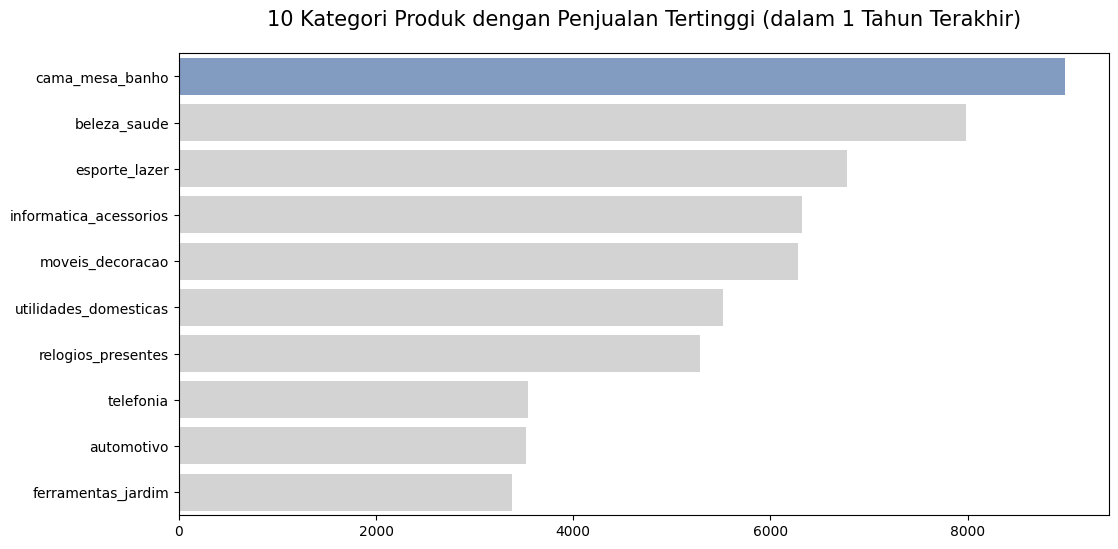

In [271]:
top_10 = top_categories.head(10)
plt.subplots(figsize=(12, 6))

colors = ["#79C" ,"#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x=top_10.values, y=top_10.index, palette=colors, hue=top_10.index)

plt.title("10 Kategori Produk dengan Penjualan Tertinggi (dalam 1 Tahun Terakhir)", loc="center", fontsize=15, pad=20)
plt.ylabel(None)
plt.xlabel(None)
plt.show()

Kategori produk yang paling laku dalam satu tahun terakhir adalah cama mesa banho

### Pertanyaan 2: Dari wilayah mana pelanggan dengan jumlah pesanan tertinggi berasal?

In [272]:
top_states = all_df['customer_state'].value_counts()
top_states.head(10)

customer_state
SP    50236
RJ    15515
MG    13809
RS     6572
PR     6035
SC     4344
BA     4090
DF     2515
GO     2466
ES     2359
Name: count, dtype: int64

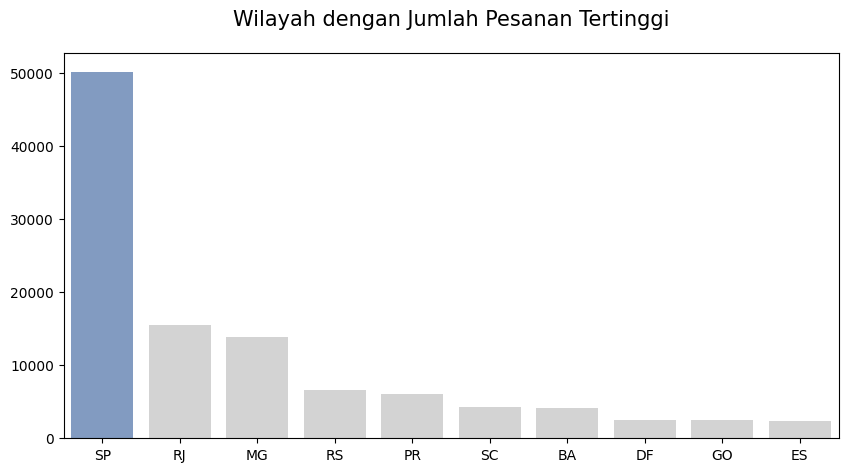

In [273]:
plt.figure(figsize=(10,5))

top_states = top_states.head(10)
colors = ["#79C" ,"#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x=top_states.index, y=top_states.values, palette=colors, hue=top_states.index)

plt.title("Wilayah dengan Jumlah Pesanan Tertinggi", pad=20, size=15)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

Negara SP adalah negara yang paling banyak pelanggan

### Pertanyaan 3: Apakah produk dengan lebih banyak foto memiliki tingkat pembelian yang lebih tinggi?

In [274]:
photo_sales_grouped = all_df.groupby('product_photos_qty')['order_id'].count()

print(photo_sales_grouped)

product_photos_qty
1.0     58957
2.0     23054
3.0     12977
4.0      8863
5.0      5599
6.0      3945
7.0      1560
8.0       774
9.0       318
10.0      354
11.0       73
12.0       60
13.0       30
14.0        6
15.0       12
17.0       11
18.0        4
19.0        2
20.0        1
Name: order_id, dtype: int64


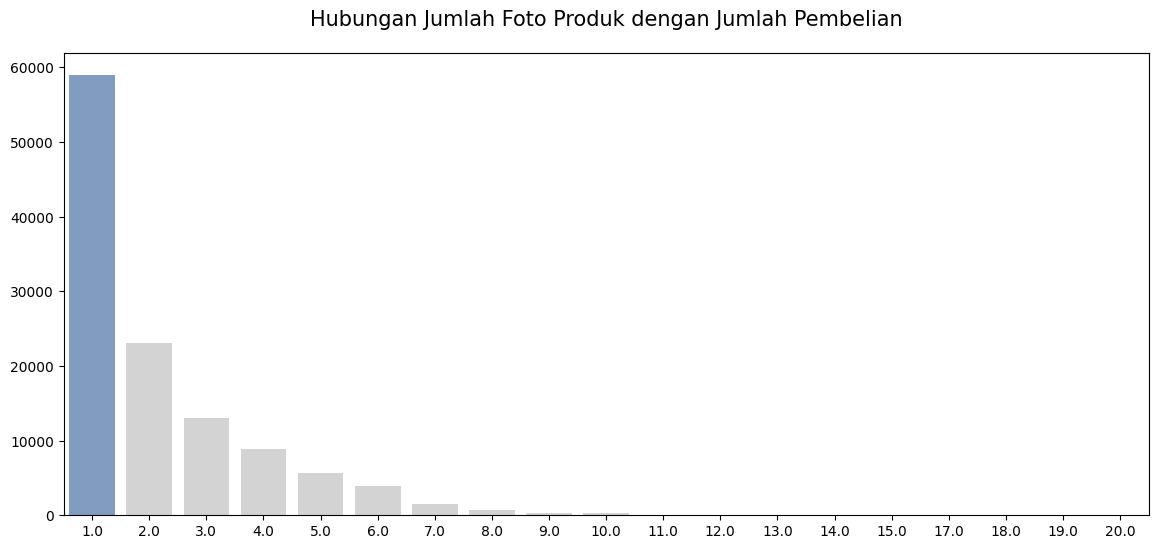

In [303]:
plt.figure(figsize=(14,6))

colors = ["#79C" ,"#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3"]

sns.barplot(x=photo_sales_grouped.index, y=photo_sales_grouped.values, palette=colors, hue=photo_sales_grouped.index, legend=False)

plt.title("Hubungan Jumlah Foto Produk dengan Jumlah Pembelian", pad=20, size=15)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

produk yang memili satu foto memiliki pembeli terbanyak, ini menyatakan bawha jumlah foto produk tidak berpengaruh kepada jumlah pembelian

### Pertanyaan 4: Metode pembayaran apa yang paling sering digunakan oleh pelanggan?

In [276]:
payment_counts = all_df['payment_type'].value_counts()

payment_counts.head(10)

payment_type
credit_card    87258
boleto         23018
voucher         6332
debit_card      1699
Name: count, dtype: int64

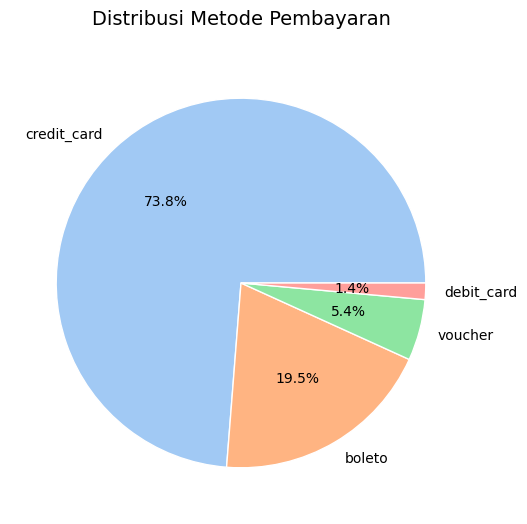

In [277]:
plt.figure(figsize=(12, 6))

plt.pie(
    payment_counts, 
    labels=payment_counts.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette("pastel"), 
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

plt.title("Distribusi Metode Pembayaran", fontsize=14, pad=20)

plt.show()


Metode pembayaran yang paling sering digunakan adalah Credit Card, dengan persentase mencapai 73.8%

**Insight:**
- Produk dalam kategori "cama mesa banho" memiliki tingkat penjualan tertinggi dalam satu tahun terakhir
- São Paulo (SP) adalah wilayah dengan jumlah pelanggan terbanyak
- Jumlah foto produk tidak berpengaruh signifikan terhadap jumlah pembelian. Produk dengan hanya satu foto memiliki jumlah pembelian terbanyak
- Credit Card menjadi metode pembayaran yang paling sering digunakan, mencapai 73.8% dari total transaksi

## Analisis Lanjutan (Opsional)

### Menghitung Total Revenue

### RFM Analysis

In [285]:
# Pastikan kolom datetime dalam format datetime
all_df["order_purchase_timestamp"] = pd.to_datetime(all_df["order_purchase_timestamp"])

# Buat DataFrame RFM
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique", 
    "price": "sum" 
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
recent_date = all_df["order_purchase_timestamp"].max().date()
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].fillna(pd.Timestamp(recent_date))
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

rfm_df.head().reset_index(drop=True)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293
1,000161a058600d5901f007fab4c27140,1,54.90,414
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552
3,0002414f95344307404f0ace7a26f1d5,1,149.90,383
4,000379cdec625522490c315e70c7a9fb,1,93.00,154


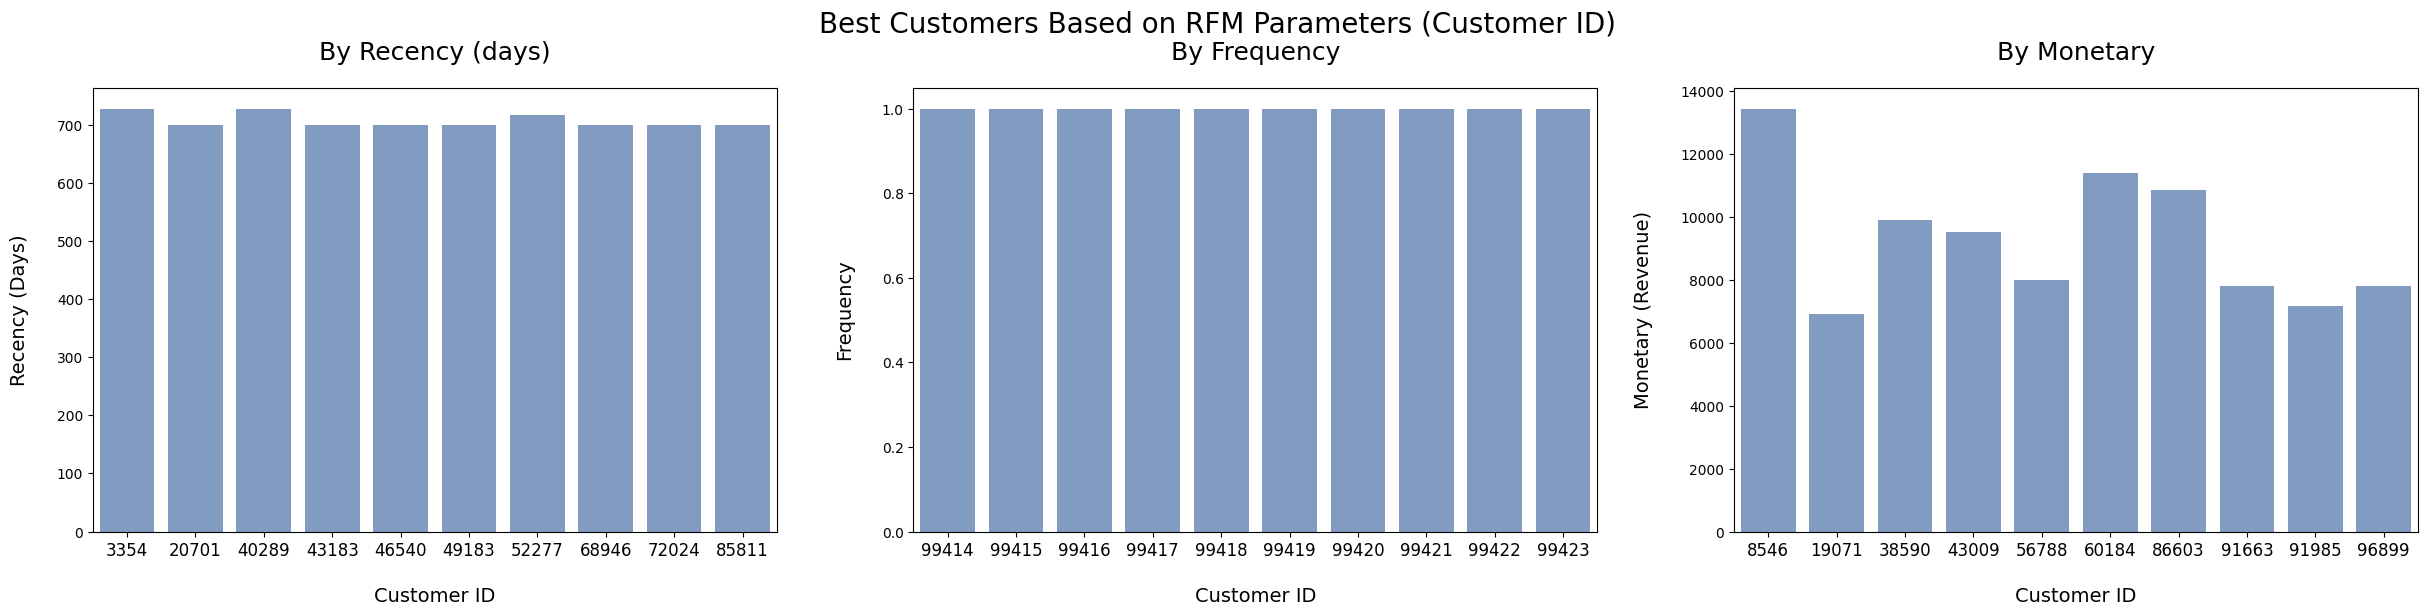

In [ ]:
top_customers_recency = rfm_df.sort_values("recency", ascending=False).head(10)
top_customers_frequency = rfm_df.sort_values("frequency", ascending=False).head(10)
top_customers_monetary = rfm_df.sort_values("monetary", ascending=False).head(10)

# Plot barplot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#79C","#79C","#79C","#79C","#79C","#79C","#79C","#79C","#79C","#79C",]

sns.barplot(x=top_customers_recency.index, y="recency", data=top_customers_recency, hue=top_customers_recency.index, palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel("Recency (Days)", fontsize=14, labelpad=20)
ax[0].set_xlabel("Customer ID", fontsize=14, labelpad=20)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18, pad=20)
ax[0].tick_params(axis='x', labelsize=12)

sns.barplot(x=top_customers_frequency.index, y="frequency", data=top_customers_frequency, hue=top_customers_frequency.index, palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel("Frequency", fontsize=14, labelpad=20)
ax[1].set_xlabel("Customer ID", fontsize=14, labelpad=20)
ax[1].set_title("By Frequency", loc="center", fontsize=18, pad=20)
ax[1].tick_params(axis='x', labelsize=12)

sns.barplot(x=top_customers_monetary.index, y="monetary", data=top_customers_monetary, hue=top_customers_monetary.index, palette=colors, ax=ax[2], legend=False)
ax[2].set_ylabel("Monetary (Revenue)", fontsize=14, labelpad=20)
ax[2].set_xlabel("Customer ID", fontsize=14, labelpad=20)
ax[2].set_title("By Monetary", loc="center", fontsize=18, pad=20)
ax[2].tick_params(axis='x', labelsize=12)

plt.suptitle("Best Customers Based on RFM Parameters (Customer ID)", fontsize=20)
plt.subplots_adjust(top=0.85)  # Menyesuaikan jarak atas setelah tight_layout
plt.show()



## Conclusion

- Conclution pertanyaan 1
Kategori produk "cama mesa banho" memiliki tingkat penjualan tertinggi dalam satu tahun terakhir. Hal ini menunjukkan bahwa produk rumah tangga seperti perlengkapan tempat tidur dan kamar mandi memiliki permintaan yang tinggi

- Conclution pertanyaan 2
Wilayah dengan jumlah pelanggan dan pesanan terbanyak adalah São Paulo (SP). Sebagai pusat ekonomi utama, wilayah ini memiliki daya beli yang tinggi

- Conclution pertanyaan 3
Jumlah foto produk tidak berpengaruh signifikan terhadap jumlah pembelian. Produk dengan hanya satu foto justru memiliki jumlah pembelian terbanyak

- Conclution pertanyaan 4
Metode pembayaran yang paling sering digunakan adalah Credit Card, dengan persentase mencapai 73.8% dari total transaksi. Hal ini menunjukkan bahwa pelanggan lebih nyaman menggunakan kartu kredit.


In [330]:
all_df.to_csv("data/all_data.csv", index=False)